# **1. Định nghĩa vấn đề (Define Problem)**
+ **Mô tả**:
    + Bộ dữ liệu bao gồm 50 mẫu từ mỗi loài trong số ba loài Iris (Iris setosa, Iris virginica và Iris versicolor).
    + Bốn đặc điểm được đo từ mỗi mẫu: chiều dài và chiều rộng của các lá đài(sepal) và cánh hoa (petal), tính bằng cm.
+ **Dữ liệu vào**:
    + sepal length (cm)
    + sepal width (cm)
    + petal length (cm)
    + petal width (cm)
+ **Kết quả**: class (Iris Setosa, Iris Versicolour, Iris Virginica)

# **2. Chuẩn bị vấn đề (Prepare Problem)**

## **2.1.Khai báo thư viện (Load Libraries)**

In [1]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline

warnings.filterwarnings("ignore")

## **2.2.Tham số chương trình**

In [2]:
# params
seed = 42  # random seed để tái dựng lại thực nghiệm giống nhau

exps_dir = "../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)

##**2.3. Nạp dữ liệu (Load Dataset)**

In [4]:
# Load dataset
data_url = "https://raw.githubusercontent.com/MinhQuang31751/-storage-csv/refs/heads/main/Data/Iris.csv"
data_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

df_org = pd.read_csv(data_url, names=data_names)
display.display(df_org.head())


,sepal-length,sepal-width,petal-length,petal-width,class
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


### **2.4.Chia dữ liệu thực nghiệm**

+ Dữ liệu ban đầu: chia 30% dữ liệu dùng để Test, 70% dùng để train
+ Dữ liệu train: chia chiến lược K-Fold với k = 5

In [5]:
index_all = np.arange(150)
index_train, index_test = train_test_split(index_all, test_size = 0.33, random_state=seed)

In [6]:
df_train = df_org.iloc[index_train]
df_test  = df_org.iloc[index_test]
print(f'train: {len(df_train)} / test: {len(df_test)} - Tỷ lệ: {len(df_train) / len(df_org)}, {len(df_test) / len(df_org)}')

train: 100 / test: 50 - Tỷ lệ: 0.6622516556291391, 0.33112582781456956


In [8]:
# Lưu dữ liệu sau khi chia
os.makedirs(f'{exps_dir}/data', exist_ok=True) # Create the directory if it doesn't exist
df_train.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
df_test.to_excel(f'{exps_dir}/data/test.xlsx', index=None)
np.savez(f'{exps_dir}/data/idx.npz', id_train = index_train, id_test = index_test)

In [9]:
# Kiểm tra lại
dict(np.load(f'{exps_dir}/data/idx.npz'))

{'id_train': array([ 96, 105,  66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,
         23,  94,  39,  95, 117,  47,  97, 113,  33, 138, 101,  62,  84,
        148,  53,   5,  93, 111,  49,  35,  80,  77,  34, 114,   7,  43,
         70,  98, 120,  83, 134, 135,  89,   8,  13, 119, 125,   3,  17,
         38,  72, 136,   6, 112, 100,   2,  63,  54, 126,  50, 115,  46,
        139,  61, 147,  79,  59,  91,  41,  58,  90,  48,  88, 107, 124,
         21,  57, 144, 129,  37, 140,   1,  52, 130, 103,  99, 116,  87,
         74, 121, 149,  20,  71, 106,  14,  92, 102]),
 'id_test': array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
          9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
        108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
         32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109])}

In [10]:
pd.read_excel(f'{exps_dir}/data/train.xlsx')

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.7,3.0,4.2,1.2,Iris-versicolor
1,6.5,3.0,5.8,2.2,Iris-virginica
2,6.7,3.1,4.4,1.4,Iris-versicolor
3,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5.6,2.8,4.9,2.0,Iris-virginica
...,...,...,...,...,...
95,5.9,3.2,4.8,1.8,Iris-versicolor
96,7.6,3.0,6.6,2.1,Iris-virginica
97,4.3,3.0,1.1,0.1,Iris-setosa
98,6.1,3.0,4.6,1.4,Iris-versicolor


In [11]:
pd.read_excel(f'{exps_dir}/data/test.xlsx')

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.3,2.5,4.9,1.5,Iris-versicolor
1,5.1,3.5,1.4,0.3,Iris-setosa
2,7.7,3.8,6.7,2.2,Iris-virginica
3,6.7,3.0,5.0,1.7,Iris-versicolor
4,6.6,3.0,4.4,1.4,Iris-versicolor
5,4.8,3.1,1.6,0.2,Iris-setosa
6,6.1,2.9,4.7,1.4,Iris-versicolor
7,6.7,3.1,5.6,2.4,Iris-virginica
8,5.8,2.7,4.1,1.0,Iris-versicolor
9,5.5,2.4,3.7,1.0,Iris-versicolor


#**3. Tiền xử lý dữ liệu (Data Preprocessing)**

##**3.1. Làm sạch dữ liệu (Data Cleaning)**

### Tạo bảng dữ liệu làm sạch
+ Chỉ giữ lại các cột Input, Ouput

In [24]:
df_train = pd.read_excel(f'{exps_dir}/data/train.xlsx')

### Xóa dữ liệu trùng nhau

In [25]:
display.display(df_train[df_train.duplicated(keep = False)])

,sepal-length,sepal-width,petal-length,petal-width,class
32,4.9,3.1,1.5,0.1,Iris-setosa
52,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
df_train.drop_duplicates(ignore_index=True, inplace=True)
display.display(df_train)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.7,3.0,4.2,1.2,Iris-versicolor
1,6.5,3.0,5.8,2.2,Iris-virginica
2,6.7,3.1,4.4,1.4,Iris-versicolor
3,5.6,2.8,4.9,2.0,Iris-virginica
4,5.6,3.0,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
93,5.9,3.2,4.8,1.8,Iris-versicolor
94,7.6,3.0,6.6,2.1,Iris-virginica
95,4.3,3.0,1.1,0.1,Iris-setosa
96,6.1,3.0,4.6,1.4,Iris-versicolor


### Xử lý giá trị rỗng, không hợp lệ

In [27]:
print("="*5, "Null Value", "="*5)
display.display(df_train.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display.display(df_train.isna().sum())

===== Null Value =====


,0
sepal-length,0
sepal-width,0
petal-length,0
petal-width,0
class,0


===== Checking NaN =====


,0
sepal-length,0
sepal-width,0
petal-length,0
petal-width,0
class,0


### Biến đổi dữ liệu (Data Transforms)

#### Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [28]:
# Class: LabelEncoder
class_encoder = LabelEncoder()
class_encoder.fit(df_train["class"])
class_names = class_encoder.classes_
print(class_names)

# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

# Load and check again
print(joblib.load(f'{save_dir}/class_encoder.joblib').classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [29]:
class_encoder.transform(df_train["class"])

array([1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2,
       2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [30]:
df_train["class"] = class_encoder.transform(df_train["class"])
display.display(df_train)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.7,3.0,4.2,1.2,1
1,6.5,3.0,5.8,2.2,2
2,6.7,3.1,4.4,1.4,1
3,5.6,2.8,4.9,2.0,2
4,5.6,3.0,4.5,1.5,1
...,...,...,...,...,...
93,5.9,3.2,4.8,1.8,1
94,7.6,3.0,6.6,2.1,2
95,4.3,3.0,1.1,0.1,0
96,6.1,3.0,4.6,1.4,1


#### Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

In [31]:
print("class_names: ", class_names)
df_onehot = pd.get_dummies(df_train["class"])
df_onehot = pd.DataFrame(df_onehot.values, columns=class_names)
display.display(df_onehot)

class_names:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Iris-setosa,Iris-versicolor,Iris-virginica
0,False,True,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
...,...,...,...
93,False,True,False
94,False,False,True
95,True,False,False
96,False,True,False


#### Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

##### Min-Max Normalization

In [32]:
# Min-Max Normalization
scale_columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_train[scale_columns])
df_minmax = df_train.copy()
df_minmax[scale_columns] = minmax_scaler.transform(df_train[scale_columns])
display.display(df_minmax)

,sepal-length,sepal-width,petal-length,petal-width,class
0,0.411765,0.454545,0.542373,0.458333,1
1,0.647059,0.454545,0.813559,0.875000,2
2,0.705882,0.500000,0.576271,0.541667,1
3,0.382353,0.363636,0.661017,0.791667,2
4,0.382353,0.454545,0.593220,0.583333,1
...,...,...,...,...,...
93,0.470588,0.545455,0.644068,0.708333,1
94,0.970588,0.454545,0.949153,0.833333,2
95,0.000000,0.454545,0.016949,0.000000,0
96,0.529412,0.454545,0.610169,0.541667,1


In [33]:
minmax_scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
       dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': 98,
 'scale_': array([0.29411765, 0.45454545, 0.16949153, 0.41666667]),
 'min_': array([-1.26470588, -0.90909091, -0.16949153, -0.04166667]),
 'data_min_': array([4.3, 2. , 1. , 0.1]),
 'data_max_': array([7.7, 4.2, 6.9, 2.5]),
 'data_range_': array([3.4, 2.2, 5.9, 2.4])}

In [34]:
# Save encoders
joblib.dump(minmax_scaler, f'{save_dir}/minmax_scaler.joblib')

['../exps/feature1/minmax_scaler.joblib']

In [35]:
joblib.load(f'{save_dir}/minmax_scaler.joblib').__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
       dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': 98,
 'scale_': array([0.29411765, 0.45454545, 0.16949153, 0.41666667]),
 'min_': array([-1.26470588, -0.90909091, -0.16949153, -0.04166667]),
 'data_min_': array([4.3, 2. , 1. , 0.1]),
 'data_max_': array([7.7, 4.2, 6.9, 2.5]),
 'data_range_': array([3.4, 2.2, 5.9, 2.4])}

In [36]:
# save scale_columns
np.savez(f'{save_dir}/scale_columns.npz', scale_columns = scale_columns)
dict(np.load(f'{save_dir}/scale_columns.npz'))

{'scale_columns': array(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
       dtype='<U12')}

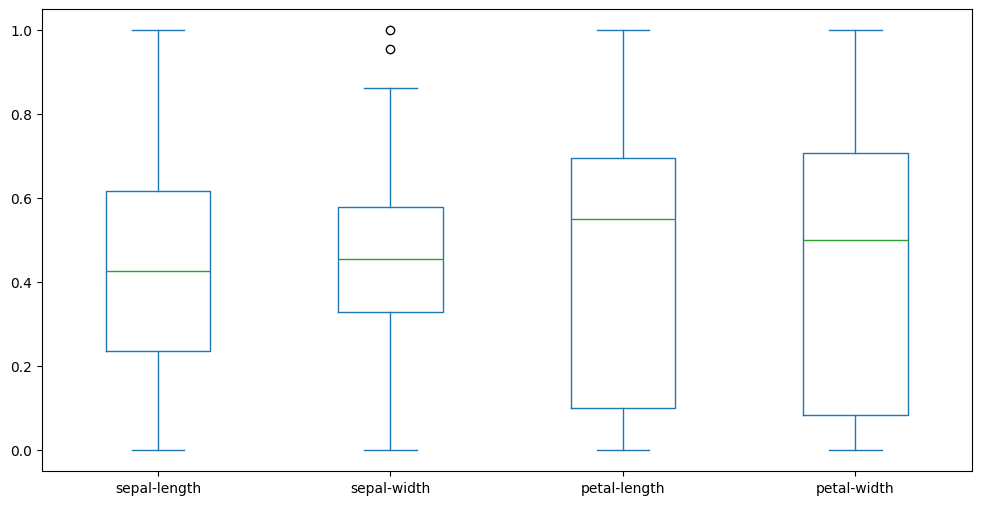

In [37]:
df_minmax[scale_columns].plot(kind="box", figsize=(12,6));

##### Standard Normalization

In [38]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_train[scale_columns])
df_standard = df_train.copy()
df_standard[scale_columns] = standard_scaler.transform(df_train[scale_columns])
display.display(df_standard)

,sepal-length,sepal-width,petal-length,petal-width,class
0,-0.143372,-0.048602,0.233770,-0.016612,1
1,0.851352,-0.048602,1.166473,1.340052,2
2,1.100033,0.189548,0.350358,0.254721,1
3,-0.267713,-0.524903,0.641828,1.068719,2
4,-0.267713,-0.048602,0.408652,0.390387,1
...,...,...,...,...,...
93,0.105309,0.427699,0.583534,0.797386,1
94,2.219098,-0.048602,1.632824,1.204386,2
95,-1.884140,-0.048602,-1.573340,-1.508943,0
96,0.353990,-0.048602,0.466946,0.254721,1


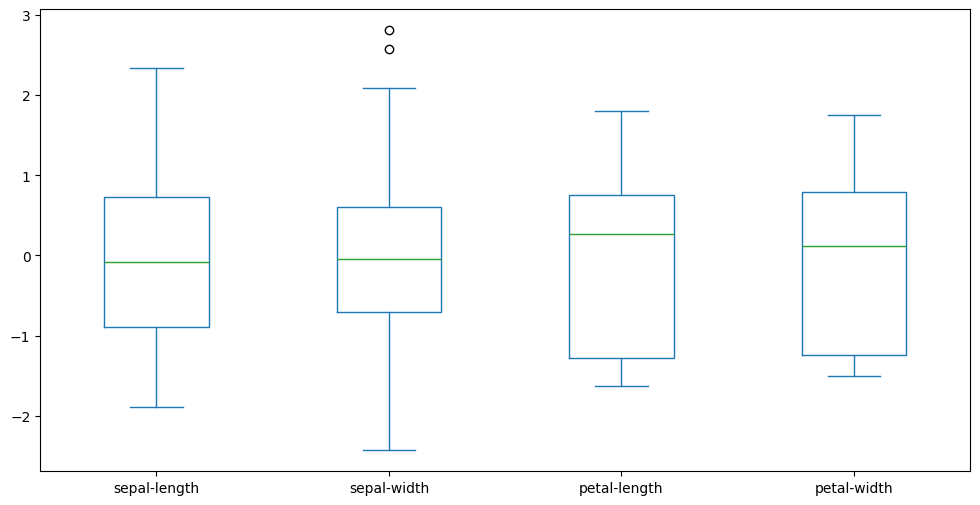

In [39]:
df_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [40]:
correlations = df_standard.corr(method='pearson')
display.display(correlations)

,sepal-length,sepal-width,petal-length,petal-width,class
sepal-length,1.000000,-0.188567,0.869807,0.805601,0.768904
sepal-width,-0.188567,1.000000,-0.492241,-0.430385,-0.493217
petal-length,0.869807,-0.492241,1.000000,0.962994,0.945138
petal-width,0.805601,-0.430385,0.962994,1.000000,0.953138
class,0.768904,-0.493217,0.945138,0.953138,1.000000


In [41]:
standard_scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
       dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': np.int64(98),
 'mean_': array([5.81530612, 3.02040816, 3.79897959, 1.2122449 ]),
 'var_': array([0.64680654, 0.1763182 , 2.94275406, 0.54331945]),
 'scale_': array([0.80424284, 0.41990261, 1.71544573, 0.73710206])}

In [42]:
# Save encoders
joblib.dump(standard_scaler, f'{save_dir}/standard_scaler.joblib')

['../exps/feature1/standard_scaler.joblib']

In [43]:
joblib.load(f'{save_dir}/standard_scaler.joblib').__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
       dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': np.int64(98),
 'mean_': array([5.81530612, 3.02040816, 3.79897959, 1.2122449 ]),
 'var_': array([0.64680654, 0.1763182 , 2.94275406, 0.54331945]),
 'scale_': array([0.80424284, 0.41990261, 1.71544573, 0.73710206])}

### Lưu dữ liệu Features

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [44]:
# MinMax
x_train = df_minmax.values[:, :-1]
y_train = df_minmax.values[:, -1]
display.display(df_minmax.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_minmax.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_minmax.xlsx', index=False)

,sepal-length,sepal-width,petal-length,petal-width,class
0,0.411765,0.454545,0.542373,0.458333,1
1,0.647059,0.454545,0.813559,0.875000,2
2,0.705882,0.500000,0.576271,0.541667,1
3,0.382353,0.363636,0.661017,0.791667,2
4,0.382353,0.454545,0.593220,0.583333,1


+ x_train: 
  [[0.41176471 0.45454545 0.54237288 0.45833333]
 [0.64705882 0.45454545 0.81355932 0.875     ]
 [0.70588235 0.5        0.57627119 0.54166667]
 [0.38235294 0.36363636 0.66101695 0.79166667]
 [0.38235294 0.45454545 0.59322034 0.58333333]]
+ y_train: 
  [1. 2. 1. 2. 1.]


In [45]:
# MinMax
x_train = df_standard.values[:, :-1]
y_train = df_standard.values[:, -1]
display.display(df_standard.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_standard.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_standard.xlsx', index=False)

,sepal-length,sepal-width,petal-length,petal-width,class
0,-0.143372,-0.048602,0.233770,-0.016612,1
1,0.851352,-0.048602,1.166473,1.340052,2
2,1.100033,0.189548,0.350358,0.254721,1
3,-0.267713,-0.524903,0.641828,1.068719,2
4,-0.267713,-0.048602,0.408652,0.390387,1


+ x_train: 
  [[-0.14337227 -0.04860213  0.23377038 -0.01661222]
 [ 0.85135216 -0.04860213  1.16647258  1.34005201]
 [ 1.10003327  0.18954833  0.35035816  0.25472063]
 [-0.26771283 -0.52490306  0.64182759  1.06871917]
 [-0.26771283 -0.04860213  0.40865205  0.39038705]]
+ y_train: 
  [1. 2. 1. 2. 1.]


**A)File chung cho Feature Set 1**

  **1.scale_columns.npz**

- Mục đích: Lưu danh sách các cột được chọn để biến đổi (scaling)

**Nội dung:** Tên các cột numerical được scale

**Dùng để:** Theo dõi và tái sử dụng cùng tập cột cho các dữ liệu mới

**2.class_encoder.joblib**

- Mục đích: Encoder cho biến phân loại (categorical variable)

**Nội dung:** LabelEncoder hoặc OneHotEncoder cho cột 'class'

**Dùng để:** Chuyển đổi nhãn phân loại sang dạng số

**3.minmax_scaler.joblib**

- Mục đích: Lưu mô hình MinMaxScaler đã được huấn luyện

**Nội dung:** Scaler đã fit với dữ liệu training

**Dùng để:** Áp dụng cùng phép biến đổi cho dữ liệu mới

**4.feat_minmax.npz**

- Mục đích: Lưu features đã được MinMax scaling

**Nội dung:** Dữ liệu đã chuẩn hóa dạng numpy array

**Dùng để:** Training model

**5.df_minmax.xlsx**

- Mục đích: File xem được của dữ liệu đã chuẩn hóa

**Nội dung:** DataFrame đầy đủ với MinMax scaling

**Dùng để:** Kiểm tra trực quan, báo cáo

**B)Feature Standard Scaling**

**1.standard_scaler.joblib**

**Mục đích:** Lưu mô hình StandardScaler đã huấn luyện

**Nội dung:** Scaler đã fit với dữ liệu training

**Dùng để:** Áp dụng cùng phép biến đổi cho dữ liệu mới

**2.feat_standard.npz**

- Mục đích: Lưu features đã được Standard scaling

**Nội dung:** Dữ liệu đã chuẩn hóa (mean=0, std=1) dạng numpy array

**Dùng để:** Training model

**3.df_standard.xlsx**
- Mục đích: File xem được của dữ liệu đã chuẩn hóa

**Nội dung:** DataFrame đầy đủ với Standard scaling

**Dùng để:**Kiểm tra trực quan, báo cáo

**C)Mục đích tổng thể**

So sánh hiệu suất giữa 2 phương pháp scaling khác nhau

Tái sử dụng cho các mô hình sau này

Đảm bảo tính nhất quán khi xử lý dữ liệu mới

Documentation cho quá trình thực nghiệm

# **4.Khởi tạo thí nghiệm**

## Khai báo thư viện

In [47]:
# Load libraries
import os, sys
from IPython import display
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker

import pandas as pd
import seaborn as sns
import joblib
import pprint
import random

# preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn

# metrics
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay, confusion_matrix

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### Tham số thực nghiệm

In [48]:
params = {}

params["exps_dir"]  = "../exps"
params["exp_name"]  = "iris_classification_02_standard"

params["exps_root"] = f'{params["exps_dir"]}/result1_standard'
params["save_dir"]  = f'{params["exps_dir"]}/result1_{params["exp_name"]}'

params["class_encoder_path"] = f'{params["exps_dir"]}/feature1/class_encoder.joblib'

params["data_path"]  = f'{params["exps_dir"]}/feature1/df_standard.xlsx'

# params["data_path"]  = f'{params["exps_root"]}/df_clean.xlsx'
# params["exps_name"]  = "iris_classification_02_clean"

# params["data_path"]  = f'{params["exps_root"]}/df_clean_minmax.xlsx'
# params["exps_name"]  = "iris_classification_02_minmax"

params["k_fold"] = 5
params["random_state"] = 42

print("params: ")
for k in params: print(f'+ {k}: {params[k]}')

# cố định random-state để phục hồi lại kết quả thí nghiệm
random.seed(params["random_state"])
os.environ['PYTHONHASHSEED'] = str(params["random_state"])
np.random.seed(params["random_state"])

params: 
+ exps_dir: ../exps
+ exp_name: iris_classification_02_standard
+ exps_root: ../exps/result1_standard
+ save_dir: ../exps/result1_iris_classification_02_standard
+ class_encoder_path: ../exps/feature1/class_encoder.joblib
+ data_path: ../exps/feature1/df_standard.xlsx
+ k_fold: 5
+ random_state: 42


#**5.Dữ liệu kiểm nghiệm (Validation Dataset)**

Chúng ta chuẩn bị dữ liệu kiểm nghiệm theo phương pháp hold-out:
+ Tập dữ liệu được chia thành 2 phần train/test với tỉ lệ 7/3 (đã làm trước)
+ Tập train sẽ được dùng để huấn luyện, điều chỉnh tham số với chiến lược:
    + Hold-out (tiếp tục chia 7/3 với train/valid)
    + k-fold (chia thành k phần đều nhau với k-1 phần cho train/1 phần cho valid)
    + Trong đó, train là dùng huấn luyện và valid dùng điều chỉnh tham số
+ Tập test dùng để kiểm nghiệm lại độ hiệu quả của thuật toán sau khi chọn mô hình tối ưu

In [49]:
# Tải thông tin dữ liệu
df_data   = pd.read_excel(params["data_path"])

print(f'Data path [{params["data_path"]}]')
display.display(df_data)

Data path [../exps/feature1/df_standard.xlsx]


,sepal-length,sepal-width,petal-length,petal-width,class
0,0.411765,0.454545,0.542373,0.458333,1
1,0.647059,0.454545,0.813559,0.875000,2
2,0.705882,0.500000,0.576271,0.541667,1
3,0.382353,0.363636,0.661017,0.791667,2
4,0.382353,0.454545,0.593220,0.583333,1
...,...,...,...,...,...
93,0.470588,0.545455,0.644068,0.708333,1
94,0.970588,0.454545,0.949153,0.833333,2
95,0.000000,0.454545,0.016949,0.000000,0
96,0.529412,0.454545,0.610169,0.541667,1


In [51]:
# Chia dữ liệu thành trường input/output
X_train, y_train = df_data.values[:, :-1], df_data.values[:, -1].astype(int)

# **6. Lượng giá thuật toán (Evaluate Algorithms)**

## **6.1. Baselines**

Sau khi chuẩn bị dữ liệu, chúng ta cần đánh giá hiệu suất ban đầu của các thuật toán phân loại khác nhau trên tập huấn luyện.

* Các mô hình cơ sở hoạt động như thế nào trên tập dữ liệu huấn luyện?
* Có sự khác biệt đáng kể về độ chính xác giữa các mô hình không?
* Phân bố độ chính xác trên các fold của từng mô hình ra sao?

In [52]:
kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])
print(f"+ X_train: {len(X_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 98
Fold 0: 
+ train_idx: [ 1  2  3  5  6  7  8  9 11 13 14 15 16 17 19 20 21 23 24 25 27 28 29 30
 32 33 34 35 36 37 38 39 41 43 45 46 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 63 65 66 67 68 69 70 71 72 74 76 77 78 79 80 82 84 85 86 87 88 89
 91 92 93 95 96 97]
+ valid_idx: [ 0  4 10 12 18 22 26 31 40 42 44 47 62 64 73 75 81 83 90 94]
+ train / valid: [ 0  4 10 12 18 22 26 31 40 42 44 47 62 64 73 75 81 83 90 94]
Fold 1: 
+ train_idx: [ 0  1  2  3  4  6  7  8 10 12 13 14 17 18 19 20 21 22 23 24 25 26 27 29
 31 32 34 36 37 38 40 41 42 43 44 46 47 48 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 66 67 71 73 74 75 76 77 78 79 81 82 83 84 85 86 87 89 90
 91 92 94 95 96 97]
+ valid_idx: [ 5  9 11 15 16 28 30 33 35 39 45 49 65 68 69 70 72 80 88 93]
+ train / valid: [ 5  9 11 15 16 28 30 33 35 39 45 49 65 68 69 70 72 80 88 93]
Fold 2: 
+ train_idx: [ 0  1  2  4  5  9 10 11 12 14 15 16 18 20 21 22 23 26 28 29 30 31 32 33
 35 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 57 58 59 

In [53]:
X_train[[0, 2, 10]]

array([[0.41176471, 0.45454545, 0.54237288, 0.45833333],
       [0.70588235, 0.5       , 0.57627119, 0.54166667],
       [0.23529412, 0.59090909, 0.11864407, 0.16666667]])

In [54]:
y_train[[0,2,10]]

array([1, 1, 0])

In [55]:
# Mô hình mặc định (models, results, hyper-parameters)
baseline_models  = {}
baseline_results = {}

# khởi tạo các tham số mặc định
baseline_models['LR']   = LogisticRegression(random_state=params["random_state"])
baseline_models['LDA']  = LinearDiscriminantAnalysis()
baseline_models['KNN']  = KNeighborsClassifier()
baseline_models['CART'] = DecisionTreeClassifier(random_state=params["random_state"])
baseline_models['NB']   = GaussianNB()
baseline_models['SVM']  = SVC(random_state=params["random_state"])

# Huấn luyện từng mô hình cơ sở
for model_name in baseline_models:

    baseline_results[model_name] = []

    print(f'Model [{model_name}]:')

    # Chiến lược chia dữ liệu trên tập X_train
    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])

    # Tách X_train, y_train thành 2 tập train, valid trên từng fold
    # Với mỗi fold, train cho huấn luyện, valid cho lượng giá và điều chỉnh tham số
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
        # Chia 2 tập thành train/valid
        X1_train, y1_train = X_train[train_idx], y_train[train_idx]
        X1_valid, y1_valid = X_train[valid_idx], y_train[valid_idx]


        # Lấy mô hình khởi tạo
        model_clf = sklearn.base.clone(baseline_models[model_name])

        # Huấn luyện mô hình
        model_clf.fit(X1_train, y1_train)

        # Lượng giá mô hình
        y1_pred_valid = model_clf.predict(X1_valid)

        # Tính toán metrics: accuracy
        valid_acc = accuracy_score(y1_valid, y1_pred_valid)

        # Lưu metrics trên từng fold
        baseline_results[model_name].append(valid_acc)

        pass # fold
    # Chúng ta đơn giản sử dụng lệnh bên dưới thay cho khối lệnh k-fold bên trên
    # baseline_results[name] = cross_val_score(model_clf, X_train, y_train, cv = kfold, scoring="accuracy")

    # hiển thị tham số mô hình
    print(f'+ params = {baseline_models[model_name].get_params()}')

    # hiển thị kết quả trên từng fold
    print(f'+ acc = {baseline_results[model_name]}')

    # trung bình kết quả +/ std cho tất cả các fold,
    # std: độ lệch chuẩn=> nếu cùng mean thì độ lệch nào nhỏ hơn thì tốt hơn vì ổn định và tập trung hơn
    s_msg = f'+ mean_acc = {np.mean(baseline_results[model_name]):.6f} +/- {np.std(baseline_results[model_name]):.6f}'
    print(s_msg)
    print()

    # Huấn luyện lại với trên toàn bộ dữ liệu train (re-fit all train_data)
    baseline_models[model_name].fit(X_train, y_train)
    pass # model

Model [LR]:
+ params = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
+ acc = [0.8, 0.85, 1.0, 0.8947368421052632, 0.9473684210526315]
+ mean_acc = 0.898421 +/- 0.070369

Model [LDA]:
+ params = {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
+ acc = [0.95, 0.95, 0.95, 0.8947368421052632, 1.0]
+ mean_acc = 0.948947 +/- 0.033312

Model [KNN]:
+ params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+ acc = [0.95, 1.0, 0.95, 0.9473684210526315, 0.9473684210526315]
+ mean_acc = 0.958947 +/- 0.020560

Model [CART]:
+ params = {'ccp_alpha': 0.0, 'class_weight': N

In [56]:
# Mô hình mặc định (models, results, hyper-parameters)
baseline_models  = {}
baseline_results = {}

# khởi tạo các tham số mặc định
baseline_models['LR']   = LogisticRegression(random_state=params["random_state"])
baseline_models['LDA']  = LinearDiscriminantAnalysis()
baseline_models['KNN']  = KNeighborsClassifier()
baseline_models['CART'] = DecisionTreeClassifier(random_state=params["random_state"])
baseline_models['NB']   = GaussianNB()
baseline_models['SVM']  = SVC(random_state=params["random_state"])

# Huấn luyện từng mô hình cơ sở
for model_name in baseline_models:

    baseline_results[model_name] = []

    print(f'Model [{model_name}]:')

    # Chiến lược chia dữ liệu trên tập X_train
    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])

    # Lấy mô hình khởi tạo
    model_clf = sklearn.base.clone(baseline_models[model_name])

    # Chúng ta đơn giản sử dụng lệnh bên dưới thay cho khối lệnh k-fold bên trên
    baseline_results[model_name] = cross_val_score(model_clf, X_train, y_train, cv = kfold, scoring="accuracy")

    # hiển thị tham số mô hình
    print(f'+ params = {baseline_models[model_name].get_params()}')

    # hiển thị kết quả trên từng fold
    print(f'+ acc = {baseline_results[model_name]}')

    # trung bình kết quả +/ std cho tất cả các fold,
    # std: độ lệch chuẩn=> nếu cùng mean thì độ lệch nào nhỏ hơn thì tốt hơn vì ổn định và tập trung hơn
    s_msg = f'+ mean_acc = {np.mean(baseline_results[model_name]):.6f} +/- {np.std(baseline_results[model_name]):.6f}'
    print(s_msg)
    print()

    # Huấn luyện lại với trên toàn bộ dữ liệu train (re-fit all train_data)
    baseline_models[model_name].fit(X_train, y_train)
    pass # model

Model [LR]:
+ params = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
+ acc = [0.8        0.85       1.         0.89473684 0.94736842]
+ mean_acc = 0.898421 +/- 0.070369

Model [LDA]:
+ params = {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
+ acc = [0.95       0.95       0.95       0.89473684 1.        ]
+ mean_acc = 0.948947 +/- 0.033312

Model [KNN]:
+ params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+ acc = [0.95       1.         0.95       0.94736842 0.94736842]
+ mean_acc = 0.958947 +/- 0.020560

Model [CART]:
+ params = {'ccp_alpha': 0.0, 'clas

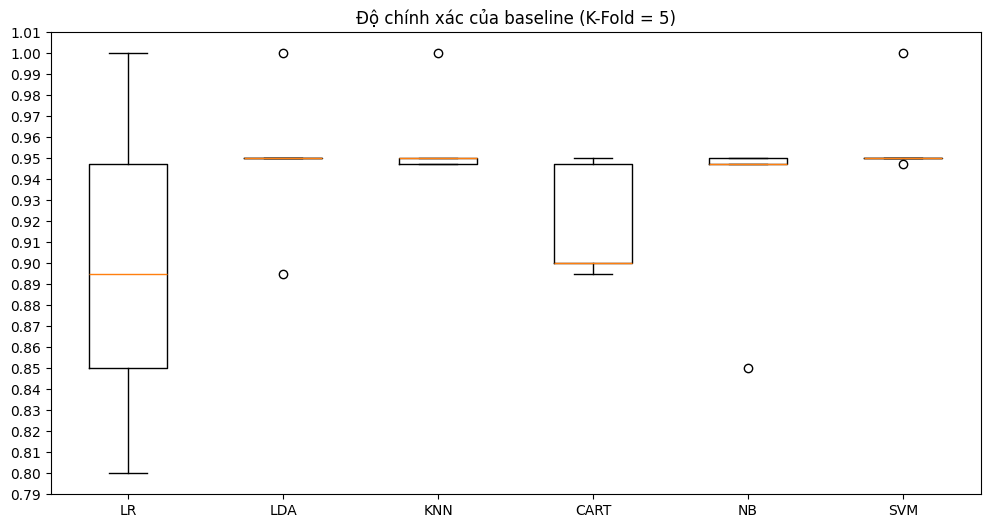

In [57]:
# In biểu đồ box-plot trên độ chính xác với k-fold
plt.figure(figsize=(12,6))
plt.boxplot(baseline_results.values())
plt.gca().set_xticklabels(baseline_results.keys())
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.title(f'Độ chính xác của baseline (K-Fold = {params["k_fold"]})')
plt.show()

Dựa trên các câu hỏi này, các mô hình cơ sở đã được lượng giá bằng chiến lược K-Fold (với k=5) trên tập dữ liệu huấn luyện (đã được chuẩn hóa bằng Standard Scaling). Độ chính xác trung bình trên các fold cho từng mô hình như sau:

- **LR:** 0.898421 +/- 0.070369
- **LDA:** 0.948947 +/- 0.033312
- **KNN:** 0.958947 +/- 0.020560
- **CART:** 0.918421 +/- 0.024798
- **NB:** 0.928947 +/- 0.039491
- **SVM:** 0.959474 +/- 0.020289

Kết quả box-plot cũng cho thấy sự phân bố độ chính xác của từng mô hình trên các fold.

## **6.2. Tinh chỉnh mô hình (Tuning Models)**

Sau khi có kết quả baseline, chúng ta muốn xem liệu việc tinh chỉnh các tham số của mô hình có thể cải thiện hiệu suất hay không.

In [58]:
tunning_results = {
    "best_clf"   : {},
    "best_score" : {},
}

tunning_models  = {}
tunning_params  = {}

# khởi tạo các tham số mặc định
tunning_models['KNN']  = KNeighborsClassifier()
tunning_params['KNN']  = {
    'n_neighbors': [2, 4, 6, 8, 10],
}

tunning_models['SVM']  = SVC(decision_function_shape = 'ovr',
                             class_weight = 'balanced',
                             probability  = True,
                             random_state = params["random_state"])
tunning_params['SVM']  = {
    'kernel': ['linear', 'rbf'], # 'sigmoid', 'poly'
    'C': [1, 10, 100,200], # 50, 70
    'gamma': [1e-3, 1e-2], # 1e-4
}

for model_name in tunning_models:
    model_clf = tunning_models[model_name]

    print(f'Model [{model_name}]:')

    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])

    grid_clf = GridSearchCV(estimator=model_clf,
                            param_grid=tunning_params[model_name],
                            cv = kfold, scoring="accuracy")
    grid_result = grid_clf.fit(X_train, y_train)

    # store best model
    tunning_results["best_clf"][model_name] = grid_clf.best_estimator_

    # get search results
    tunning_results["best_score"][model_name] = grid_result.best_score_


    # information
    print(f'+ Best score: {grid_result.best_score_}')
    print(f'+ Best turnning params: {grid_result.best_params_}')
    print(f'+ Best full params: {grid_clf.best_estimator_.get_params()}')
    print()

    pass

Model [KNN]:
+ Best score: 0.9489473684210525
+ Best turnning params: {'n_neighbors': 6}
+ Best full params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}

Model [SVM]:
+ Best score: 0.9800000000000001
+ Best turnning params: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
+ Best full params: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}



In [59]:
print(f'+ x_shape: {X_train.shape}, y_shape: {y_train.shape}')
print(f'+ Input:\n{X_train[:20, :]}')
print(f'+ Output:\n{y_train[:20]}')

+ x_shape: (98, 4), y_shape: (98,)
+ Input:
[[0.41176471 0.45454545 0.54237288 0.45833333]
 [0.64705882 0.45454545 0.81355932 0.875     ]
 [0.70588235 0.5        0.57627119 0.54166667]
 [0.38235294 0.36363636 0.66101695 0.79166667]
 [0.38235294 0.45454545 0.59322034 0.58333333]
 [0.26470588 0.68181818 0.08474576 0.04166667]
 [0.23529412 0.63636364 0.08474576 0.04166667]
 [0.20588235 0.68181818 0.10169492 0.20833333]
 [0.26470588 0.31818182 0.49152542 0.54166667]
 [1.         0.36363636 0.96610169 0.79166667]
 [0.23529412 0.59090909 0.11864407 0.16666667]
 [0.14705882 0.63636364 0.15254237 0.04166667]
 [0.08823529 0.72727273 0.         0.04166667]
 [0.20588235 0.13636364 0.38983051 0.375     ]
 [0.02941176 0.45454545 0.05084746 0.04166667]
 [0.38235294 0.31818182 0.54237288 0.5       ]
 [0.64705882 0.45454545 0.76271186 0.70833333]
 [0.23529412 0.81818182 0.10169492 0.04166667]
 [0.41176471 0.40909091 0.54237288 0.5       ]
 [0.73529412 0.45454545 0.76271186 0.83333333]]
+ Output:
[1 2 

* Việc tinh chỉnh tham số có giúp cải thiện độ chính xác của các mô hình đã chọn (KNN, SVM) trên tập huấn luyện (qua cross-validation) không?
* Tham số nào cho kết quả tốt nhất đối với từng mô hình

Chúng ta đã tiến hành tinh chỉnh tham số cho các mô hình KNN và SVM bằng GridSearchCV với chiến lược K-Fold (k=5).

- **KNN:**
    - Tham số tốt nhất: `{'n_neighbors': 6}`
    - Độ chính xác tốt nhất trên tập train (qua cross-validation): 0.9489473684210525

- **SVM:**
    - Tham số tốt nhất: `{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}`
    - Độ chính xác tốt nhất trên tập train (qua cross-validation): 0.9800000000000001

# **7. Kiểm nghiệm kết quả trên Test (Finalize Model)**

Bước cuối cùng là đánh giá hiệu suất của các mô hình đã được huấn luyện và tinh chỉnh trên tập dữ liệu kiểm nghiệm độc lập.

## Load và tiền xử lý tập test

In [60]:
# Load
df_test = pd.read_excel(f'{params["exps_dir"]}/data/test.xlsx')
print("Test: ", len(df_test))
display.display(df_test.head())

Test:  50


,sepal-length,sepal-width,petal-length,petal-width,class
0,6.3,2.5,4.9,1.5,Iris-versicolor
1,5.1,3.5,1.4,0.3,Iris-setosa
2,7.7,3.8,6.7,2.2,Iris-virginica
3,6.7,3.0,5.0,1.7,Iris-versicolor
4,6.6,3.0,4.4,1.4,Iris-versicolor


In [61]:
# Class Encoder
class_encoder = joblib.load(f'{params["exps_dir"]}/feature1/class_encoder.joblib')
df_test["class"] = class_encoder.transform(df_test['class'])
display.display(df_test.head())

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.3,2.5,4.9,1.5,1
1,5.1,3.5,1.4,0.3,0
2,7.7,3.8,6.7,2.2,2
3,6.7,3.0,5.0,1.7,1
4,6.6,3.0,4.4,1.4,1


In [62]:
# MinMax Encoder
minmax_scaler = joblib.load(f'{params["exps_dir"]}/feature1/minmax_scaler.joblib')
display.display(minmax_scaler.__dict__)

scale_columns = dict(np.load(f'{params["exps_dir"]}/feature1/scale_columns.npz'))['scale_columns']
print(scale_columns)


{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
       dtype=object),
 'n_features_in_': 4,
 'n_samples_seen_': 98,
 'scale_': array([0.29411765, 0.45454545, 0.16949153, 0.41666667]),
 'min_': array([-1.26470588, -0.90909091, -0.16949153, -0.04166667]),
 'data_min_': array([4.3, 2. , 1. , 0.1]),
 'data_max_': array([7.7, 4.2, 6.9, 2.5]),
 'data_range_': array([3.4, 2.2, 5.9, 2.4])}

['sepal-length' 'sepal-width' 'petal-length' 'petal-width']


In [63]:
df_test[scale_columns] = minmax_scaler.transform(df_test[scale_columns])
display.display(df_test.head())

,sepal-length,sepal-width,petal-length,petal-width,class
0,0.588235,0.227273,0.661017,0.583333,1
1,0.235294,0.681818,0.067797,0.083333,0
2,1.000000,0.818182,0.966102,0.875000,2
3,0.705882,0.454545,0.677966,0.666667,1
4,0.676471,0.454545,0.576271,0.541667,1


In [65]:
# Chia dữ liệu thành trường input/output
X_test, y_test = df_test.values[:, :-1], df_test.values[:, -1].astype(int)

## Đánh giá Baseline

In [66]:
class_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Baseline [LR]
+ acc = 0.940


array([[19,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 16]])

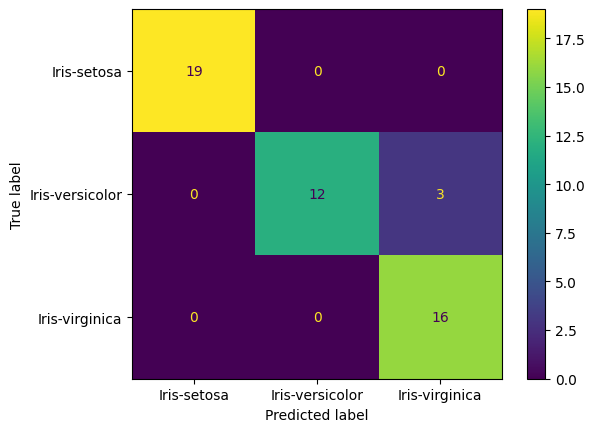

Baseline [LDA]
+ acc = 1.000


array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

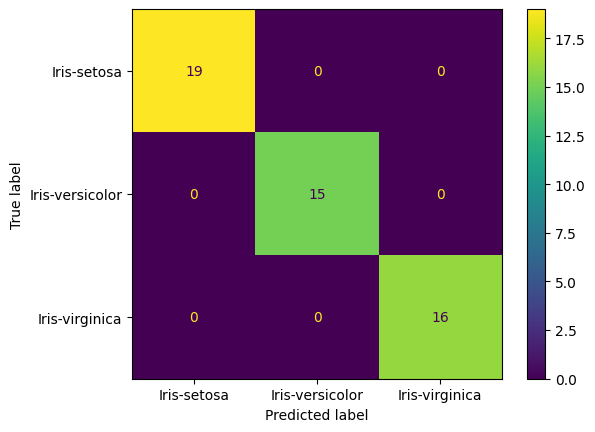

Baseline [KNN]
+ acc = 0.960


array([[19,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 16]])

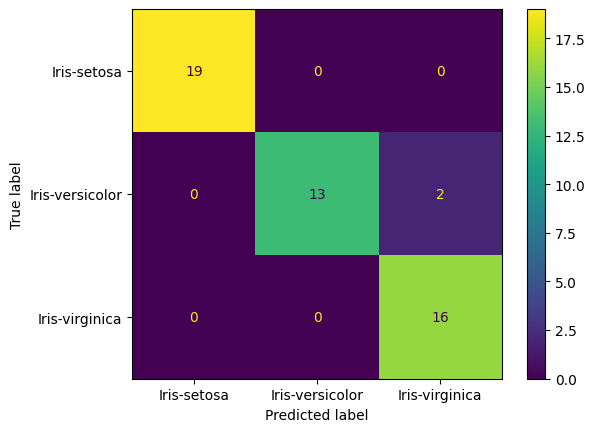

Baseline [CART]
+ acc = 0.980


array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]])

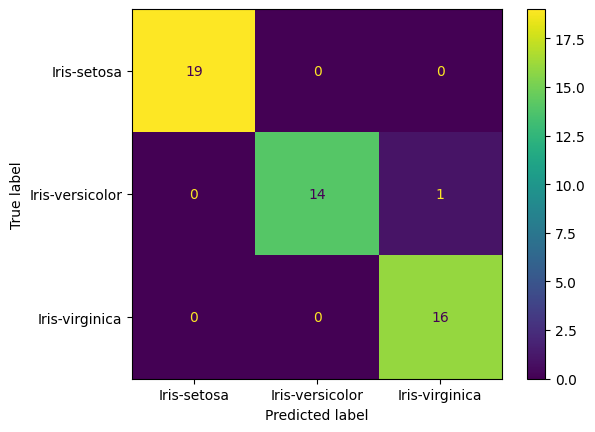

Baseline [NB]
+ acc = 0.980


array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]])

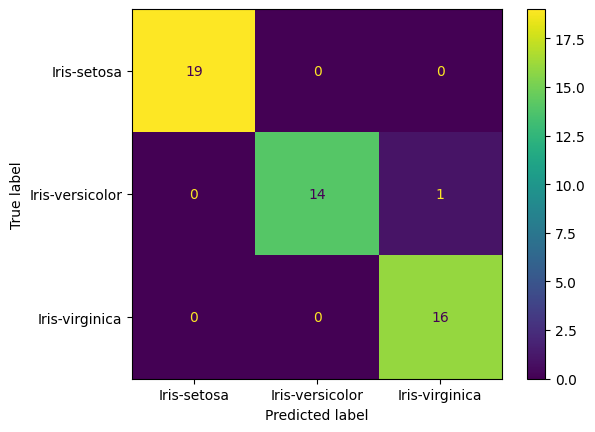

Baseline [SVM]
+ acc = 0.960


array([[19,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 16]])

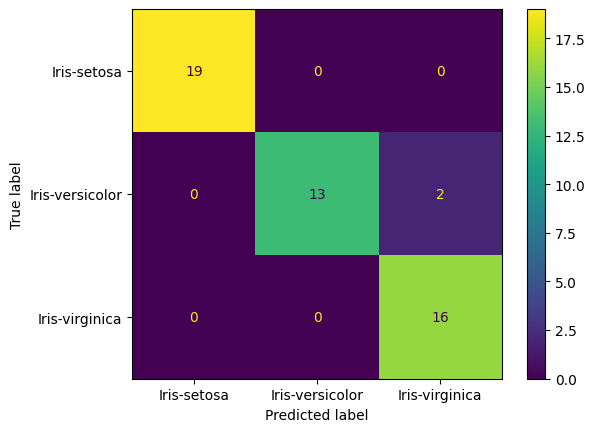

In [67]:
test_models  = {}
test_scores  = {}

# Kiểm tra kết quả trên tập test (baseline)
for model_name in baseline_models:
    model_clf = baseline_models[model_name]
    y_pred_test = model_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    # information
    print(f'Baseline [{model_name}]')
    print(f'+ acc = {test_acc:.3f}')

    cm = confusion_matrix(y_test, y_pred_test)
    display.display(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_encoder.classes_)
    disp.plot()

    plt.show()

Tunning [KNN]
+ acc = 0.980


array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]])

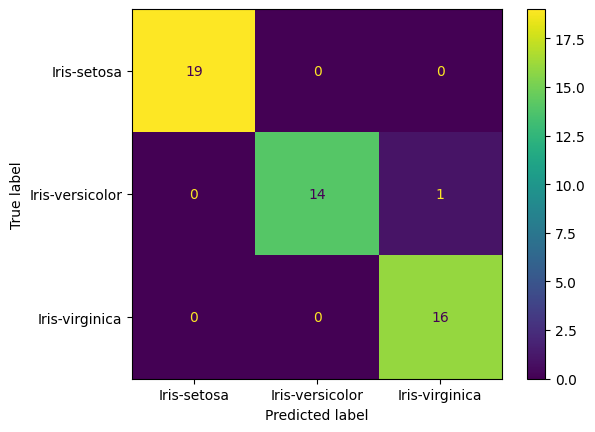

Tunning [SVM]
+ acc = 0.940


array([[19,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 16]])

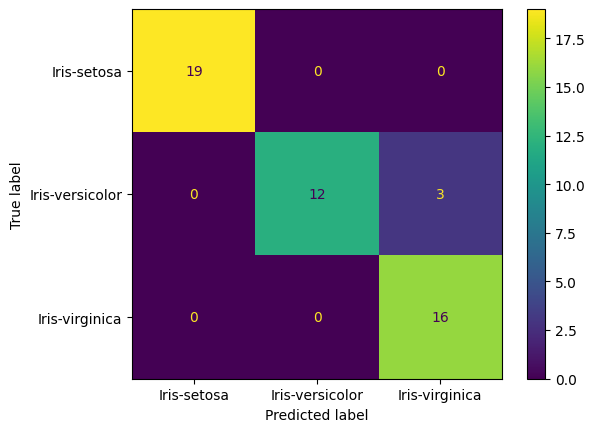

In [68]:
# Kiểm tra kết quả trên tập test (baseline)
for model_name in tunning_models:
    model_clf = tunning_results["best_clf"][model_name]
    y_pred_test = model_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    # information
    print(f'Tunning [{model_name}]')
    print(f'+ acc = {test_acc:.3f}')

    cm = confusion_matrix(y_test, y_pred_test)
    display.display(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_encoder.classes_)
    disp.plot()

    plt.show()

 chúng ta đã lượng giá các mô hình cơ sở và các mô hình sau khi tinh chỉnh trên tập dữ liệu test (đã được tiền xử lý tương tự tập train).

- **Baseline Models trên tập test:**
    - **LR:** 0.940
    - **LDA:** 1.000
    - **KNN:** 0.960
    - **CART:** 0.980
    - **NB:** 0.980
    - **SVM:** 0.960

- **Tuned Models trên tập test:**
    - **Tunning [KNN]:** 0.980 (với `n_neighbors=6`)
    - **Tunning [SVM]:** 0.940 (với `C': 10, 'gamma': 0.001, 'kernel': 'linear'}`)

# **8. Lưu kết quả thí nghiệm**

In [ ]:
save_dir = params["save_dir"]
!jupyter nbconvert $cur_dir/model1.ipynb \
    --to html \
    --output-dir $save_dir \
    --output model1

usage: jupyter-nbconvert [-h] [--debug] [--show-config] [--show-config-json]
                         [--generate-config] [-y] [--execute] [--allow-errors]
                         [--stdin] [--stdout] [--inplace] [--clear-output]
                         [--coalesce-streams] [--no-prompt] [--no-input]
                         [--allow-chromium-download]
                         [--disable-chromium-sandbox] [--show-input]
                         [--embed-images] [--sanitize-html]
                         [--log-level NbConvertApp.log_level]
                         [--config NbConvertApp.config_file]
                         [--to NbConvertApp.export_format]
                         [--template TemplateExporter.template_name]
                         [--template-file TemplateExporter.template_file]
                         [--theme HTMLExporter.theme]
                         [--sanitize_html HTMLExporter.sanitize_html]
                         [--writer NbConvertApp.writer_class]
   

# **9. Kết luận (Conclusion)**

**Tổng kết:**

- Mô hình **LDA** cho thấy độ chính xác cao nhất (1.000) trên tập test trong số các mô hình cơ sở.
- Mô hình **KNN** sau khi tinh chỉnh tham số (`n_neighbors=6`) đạt độ chính xác 0.980 trên tập test, cao hơn so với phiên bản baseline (0.960).
- Mô hình **SVM** sau khi tinh chỉnh tham số không đạt được độ chính xác cao như phiên bản baseline trên tập test, cho thấy việc tinh chỉnh có thể không cải thiện hiệu suất trên dữ liệu mới hoặc cần khám phá thêm không gian tham số.
- Các mô hình **CART** và **NB** cũng cho kết quả tốt trên tập test (0.980).

Dựa trên kết quả này, **LDA** hoặc **KNN (tinh chỉnh)** có thể được xem xét là mô hình tiềm năng để phân loại tập dữ liệu Iris với phương pháp tiền xử lý Standard Scaling.